### **Analisa Simulasi Kontrol PID dalam Sistem Oven**


Dalam Simulasi ini kita akan melihat bagaimana Kontrol PID dalam mengendalikan pemanas dan mengatur suhu oven dengan menggunakan nilai-nilai kontrol PID sebagai berikut :

*   P = 5
*   I = 1
*   D = 3


In [2]:
pip install tclab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 2.9 MB/s eta 0:00:00


Menginstall Library TCLab

In [3]:
pip install matplotlib

Menginstall Library Matplotlib untuk Plotting/Memvisualisasikan data

In [4]:
%matplotlib inline
from tclab import clock, setup, Historian, Plotter


def PID(Kp, Ki, Kd, MV_bar=0):
    e_prev = 0
    t_prev = -100
    I = 0

    MV = MV_bar

    while True:
        t, PV, SP = yield MV

        e = SP - PV

        P = Kp*e
        I = I + Ki*e*(t - t_prev)
        D = Kd*(e - e_prev)/(t - t_prev)

        MV = MV_bar + P + I + D

        e_prev = e
        t_prev = t


Kode ini mendefinisikan fungsi bernama PID yang mengimplementasikan pengontrol PID. Fungsi ini mengambil tiga parameter: Kp, Ki, dan Kd, yang masing-masing merupakan gain proporsional, integral, dan derivatif. Fungsi ini juga mengambil parameter opsional MV_bar, yang merupakan nilai awal dari variabel yang dimanipulasi.

Fungsi ini menginisialisasi beberapa variabel untuk menyimpan data dari iterasi loop sebelumnya. Loop while True: berjalan tanpa batas, menghasilkan nilai saat ini dari variabel yang dimanipulasi (MV) dan menunggu nilai baru dari waktu (t), variabel proses (PV), dan setpoint (SP).

Perhitungan PID dilakukan di dalam loop. Kesalahan (e) dihitung sebagai perbedaan antara setpoint dan variabel proses. Istilah proporsional (P), integral (I), dan derivatif (D) kemudian dihitung menggunakan kesalahan dan perbedaan waktu. Variabel yang dimanipulasi diperbarui dengan menambahkan istilah P, I, dan D ke nilai awal.

Terakhir, data yang disimpan diperbarui untuk iterasi loop berikutnya.

In [5]:
TCLab = setup(connected=False, speedup=10)

Kode ini menyiapkan perangkat keras TCLab. Parameter connected=False menunjukkan bahwa kode tersebut tidak terhubung ke perangkat keras nyata, tetapi mensimulasikan perangkat keras. Parameter speedup=10 menunjukkan bahwa simulasi harus berjalan 10 kali lebih cepat daripada waktu nyata.

In [6]:
controller = PID(5, 1, 3)
controller.send(None)

0

Kode ini membuat objek pengontrol PID dengan gain yang ditentukan dan menginisialisasinya.



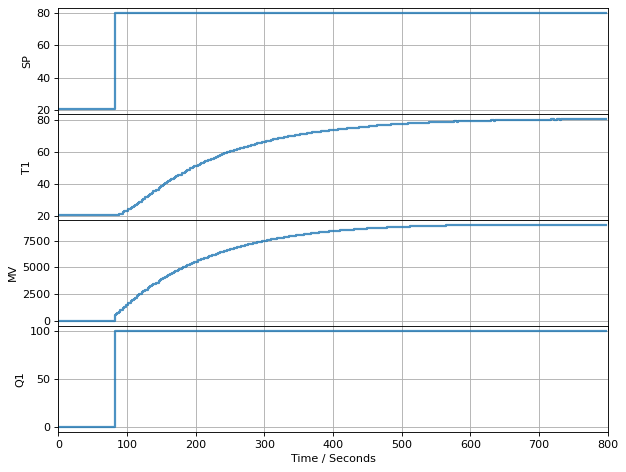

TCLab Model disconnected successfully.


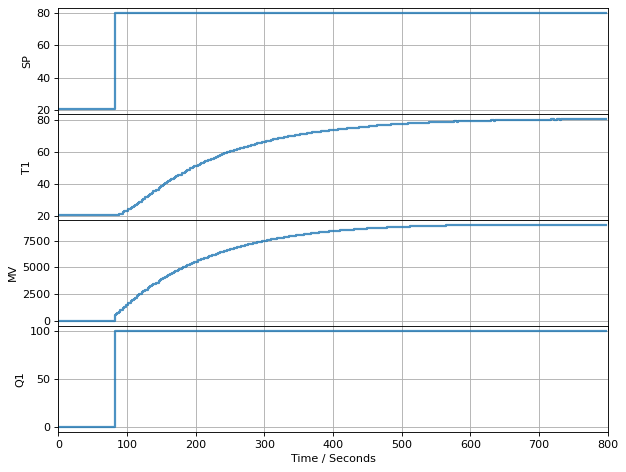

In [7]:
tfinal = 800

with TCLab() as lab:
    h = Historian([('SP', lambda: SP), ('T1', lambda: lab.T1), ('MV', lambda: MV), ('Q1', lab.Q1)])
    p = Plotter(h, tfinal)
    T1 = lab.T1
    for t in clock(tfinal, 2):
        SP = T1 if t < 80 else 80
        PV = lab.T1
        MV = controller.send([t, PV, SP])
        lab.U1 = MV
        p.update(t)

Kode ini menjalankan simulasi selama 800 detik dan menampilkan hasil dari simulasi kedalam plot/grafik.